In [165]:
import glob
import numpy as np # scientifique computation
import pandas as pd # data manipulation
from matplotlib import pyplot as plt # dataviz
import seaborn as sns
%matplotlib notebook
%matplotlib inline
pd.options.display.max_columns = None
import math

# split dataset & prepare 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# pipeline
from sklearn.pipeline import Pipeline

# ML model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# DL model
from sklearn.neural_network import MLPRegressor

# metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [123]:
path_to_interim = '../data/interim/'
files = sorted(glob.glob(path_to_interim+'*'))

# upload dataset
df = pd.read_csv(files[0])

# choose relevant features
to_drop = ['engine_id', 'time_cycle', 'max_cycle'] # id/label cols
cst_features = ['op_set_3', 'sensor_18', 'sensor_19'] # constant features
quasi_cst_features = ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16'] # quasi-constant features
high_corr_to_drop = ['sensor_14'] # drop corrected core speed - sensor 14
discreet_features = ['op_set_2', 'sensor_17']

# keep the ones to use for ML
cols_to_keep = [x for x in df.columns if x not in 
                to_drop + cst_features + quasi_cst_features + ['HI']]

# sensor_14 & op_set_1 to drop
cols_to_keep_2 = [x for x in df.columns if x not in 
                to_drop + cst_features + quasi_cst_features + high_corr_to_drop + discreet_features + ['HI'] + ['op_set_1']]

In [124]:
print(cols_to_keep)
print('\n')
print(cols_to_keep_2)

['op_set_1', 'op_set_2', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'RUL']


['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_20', 'sensor_21', 'RUL']


In [125]:
# look for engines above
selected_id = [69, 15, 41, 39]
df_sel = df.loc[df['engine_id'].isin(selected_id)]

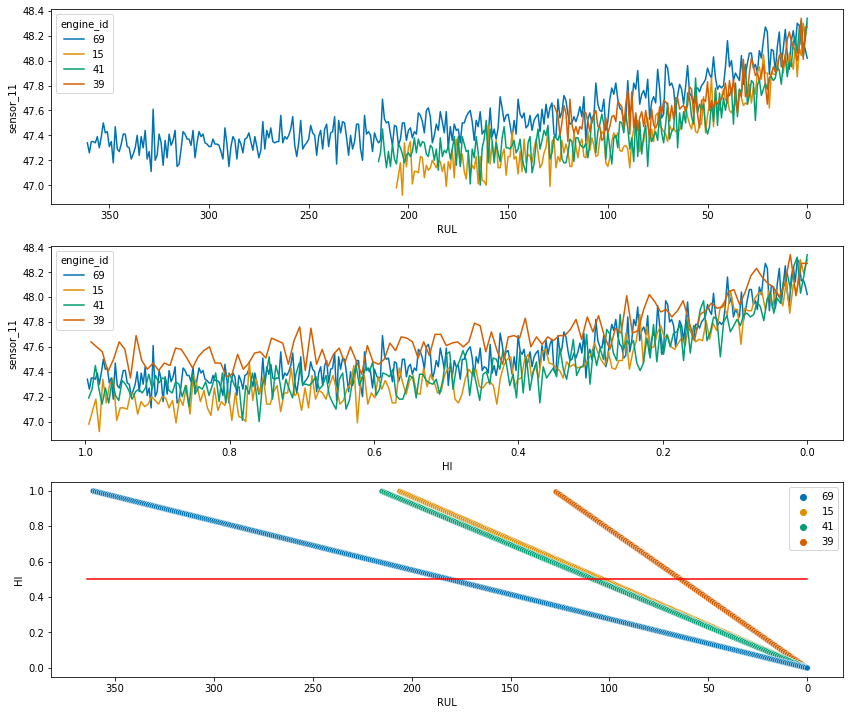

In [146]:
plt.figure(figsize=(12,10))
plt.subplot(311)
sns.lineplot(data=df_sel, y='sensor_11', x='RUL', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
plt.gca().invert_xaxis()

plt.subplot(312)
sns.lineplot(data=df_sel, y='sensor_11', x='HI', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
plt.gca().invert_xaxis()

plt.subplot(313)
sns.scatterplot(data=df_sel, x='RUL', y='HI', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
sns.lineplot(x=np.arange(0,365), y=0.5, color = 'red')
plt.gca().invert_xaxis()

plt.tight_layout()


In [127]:
df

,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,0.994792
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,0.989583
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,0.984375
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,0.979167
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,0.973958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4,0.020000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3,0.015000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2,0.010000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1,0.005000


In [128]:
df[['RUL', 'HI']].corr()

,RUL,HI
RUL,1.00000,0.90846
HI,0.90846,1.00000


In [129]:
X_to_scale

,op_set_1,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_15,sensor_20,sensor_21
0,-0.0007,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,39.06,23.4190
1,0.0019,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,39.00,23.4236
2,-0.0043,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,38.95,23.3442
3,0.0007,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,38.88,23.3739
4,-0.0019,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,38.49,22.9735
20627,-0.0016,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,38.30,23.1594
20628,0.0004,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,38.44,22.9333
20629,-0.0011,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,38.29,23.0640


In [158]:
# assign target and features
y = df['RUL']
# y = df['HI']
X = df[cols_to_keep_2[:-1]]
                
# # split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# features scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16504, 12) (4127, 12)
(16504,) (4127,)


In [159]:
# # polynomial features
poly = PolynomialFeatures(2, interaction_only=True)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16504, 79) (4127, 79)
(16504,) (4127,)


In [160]:
pd.DataFrame(X_train) 
X_train.shape

(16504, 79)

In [161]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
count,16504.0,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000
mean,1.0,-1.064207e-13,-9.622292e-16,8.970917e-15,-1.612509e-13,-3.131335e-12,-3.295527e-15,1.195704e-14,4.080950e-14,8.344466e-12,-3.223575e-17,-1.930642e-14,4.567575e-14,0.606229,0.717127,-0.701695,0.663987,0.274419,0.742061,-0.725287,0.662886,0.678163,-0.661473,-0.668430,0.679374,-0.668189,0.603149,0.325232,0.697635,-0.683248,0.600599,0.643400,-0.629898,-0.633315,-0.791652,0.745448,0.295933,0.829245,-0.815652,0.744993,0.758396,-0.748164,-0.744152,-0.765909,-0.217964,-0.822218,0.811525,-0.764217,-0.746341,0.735645,0.736615,-0.034529,0.782288,-0.785790,0.824382,0.702285,-0.686854,-0.685675,0.273525,-0.213088,-0.036858,0.292352,-0.284654,-0.295361,-0.846466,0.780192,0.780750,-0.769758,-0.772948,-0.786230,-0.765628,0.751441,0.755665,0.698818,-0.686365,-0.686072,-0.706189,-0.703217,0.692403
std,0.0,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.142073,1.171746,1.168398,1.182510,1.415876,1.188900,1.180356,1.183694,1.163198,1.152861,1.161754,1.174297,1.149391,1.131165,1.535191,1.177712,1.155194,1.119055,1.161108,1.157145,1.148597,1.214432,1.216405,1.466388,1.234018,1.226459,1.216152,1.205775,1.194033,1.194157,1.241904,1.277140,1.223658,1.236957,1.238162,1.186335,1.180544,1.186592,1.165932,1.226070,1.257629,1.422550,1.189457,1.176723,1.186326,1.422575,1.257905,1.150604,1.436659,1.424500,1.438425,1.242575,1.226075,1.210921,1.204452,1.208463,1.255389,1.204737,1.188124,1.195298,1.184467,1.174751,1.185436,1.185694,1.177941,1.170916
min,1.0,-2.938678e+00,-3.172346e+00,-2.966727e+00,-3.956183e+00,-2.771903e+00,-1.869384e+00,-2.587606e+00,-3.499778e+00,-2.997504e+00,-3.126635e+00,-3.623265e+00,-3.639569e+00,-2.617204,-1.978887,-11.446659,-3.235516,-4.749504,-1.723246,-10.841829,-2.464360,-2.466847,-10.698053,-9.403211,-2.634707,-10.304608,-2.759688,-4.847820,-2.099887,-12.163578,-3.427803,-2.867510,-11.305985,-13.815652,-12.153854,-1.914092,-5.071597,-1.069313,-10.750999,-2.095984,-2.203303,-11.510494,-10.628981,-12.962083,-17.564936,-11.830857,-1.495082,-12.221596,-9.775213,-1.888727,-1.787568,-6.340764,-1.655302,-12.928407,-1.420098,-2.471076,-15.357902,-14.858299,-4.979503,-19.199020,-6.299795,-4.247973,-19.027814,-18.910226,-10.597010,-1.814620,-1.831797,-10.987156,-9.732275,-11.143235,-10.209096,-1.945815,-2.160234,-1.784330,-14.480548,-15.679022,-10.618823,-11.567343,-2.631052
25%,1.0,-7.251406e-01,-6.938832e-01,-7.303655e-01,-6.354530e-01,-6.587705e-01,-5.495113e-01,-7.157672e-01,-6.153261e-01,-7.791816e-01,-7.256746e-01,-6.418053e-01,-6.269931e-01,-0.026123,0.004493,-1.052016,-0.007709,-0.145453,0.006336,-1.062720,-0.008503,-0.003456,-0.975919,-0.989458,-0.006141,-0.980840,-0.023683,-0.1324

In [166]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print(f'R² score : {lin_reg.score(X_train, y_train)}')
print(f'MSE      : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE     : {math.sqrt(mean_squared_error(y_test, y_pred))}')

R² score : 0.6211987248248458
MSE      : 1837.1856004542174
RMSE     : 42.8624031110508


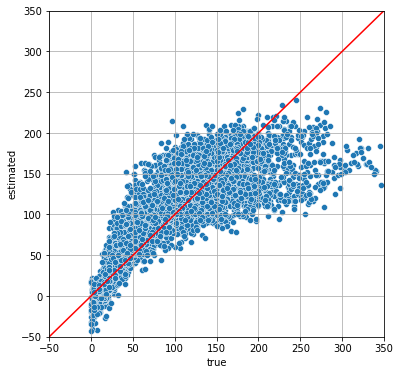

In [167]:
def plot_rul_true_estimated():

    # reset index y_test
    y_test.reset_index(drop=True, inplace=True)

    # create RUL df to compute error,d and score,s
    RUL = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1, ignore_index=True )
    RUL.rename(columns={0:'true', 1:'estimated'}, inplace=True)

    # cast as int
    RUL['estimated'] = [int(i) for i in RUL['estimated']]

    # compute error d
    RUL['error'] = RUL['estimated'] - RUL['true']
    
    # plotting
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=RUL, x='true', y='estimated')
    sns.lineplot(x=np.arange(-50,350), y=np.arange(-50,350), color = 'red')
    plt.xlim(-50,350)
    plt.ylim(-50,350)
    plt.grid()
    plt.show()
    
plot_rul_true_estimated()    

In [136]:
features_coef = pd.DataFrame(lin_reg.coef_, np.array(cols_to_keep_2[:-1])).reset_index()

In [137]:
features_coef.sort_values(0, ascending=True, inplace=True)

In [138]:
features_coef

,index,0
5,sensor_9,-12.830127
6,sensor_11,-11.090935
2,sensor_4,-7.341750
9,sensor_15,-4.892702
0,sensor_2,-4.071598
1,sensor_3,-2.645247
4,sensor_8,-0.593663
8,sensor_13,-0.538960
10,sensor_20,3.411043
11,sensor_21,4.445586


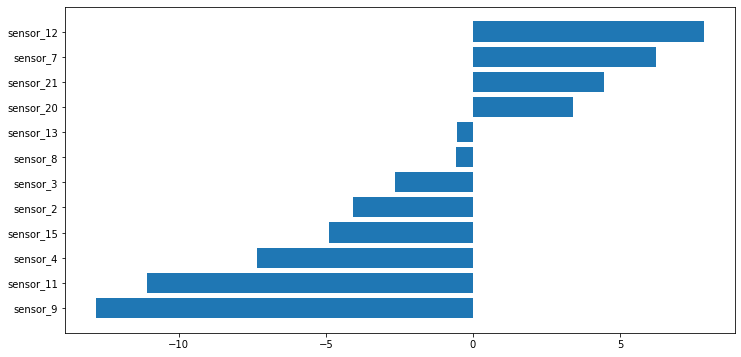

In [139]:
plt.figure(figsize=(12,6))
plt.barh(features_coef['index'], features_coef[0])
plt.show()